### Chapter 2 - Small Worlds Model

In [2]:
import os

from IPython.display import set_matplotlib_formats
import jax.numpy as jnp
from jax import random, vmap
from jax.scipy.special import logsumexp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import numpyro
from numpyro.diagnostics import hpdi
import numpyro.distributions as dist
from numpyro import handlers
from numpyro.infer import MCMC, NUTS

plt.style.use("bmh")
if "NUMPYRO_SPHINXBUILD" in os.environ:
    set_matplotlib_formats("svg")

assert numpyro.__version__.startswith("0.8.0")

In [103]:
# biased coin model
# 1 = heads
# 0 = tails
# let `c` be the unknown true probability of heads
# `X` be the number of times heads occurs in the data (heads = 1, tails = 0)
data = [1, 0, 1, 1, 1, 0, 1, 0, 1]

In [104]:
# binomial 
# i.e. we flip the coin `total_count` times and observe some data...
# if we assume a value for `c`, the likelihood is given by a binomial
# model
c_guess = 0.5
total_count = 9
binomial = dist.Binomial(total_count=total_count, probs=c_guess)
support = binomial.support
print(f"Support: [{support.lower_bound}, {support.upper_bound}]")

Support: [0, 9]


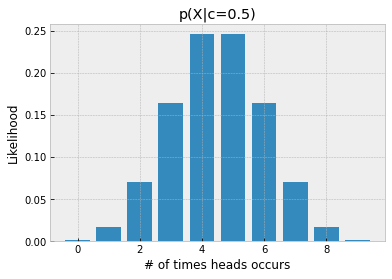

In [105]:
# visualise the likelihood
plt.figure()
plt.title("p(X|c=0.5)")
plt.xlabel("# of times heads occurs")
plt.ylabel("Likelihood")
x = np.arange(total_count+1)
y = np.exp(binomial.log_prob(x))
plt.bar(x, y);

In [124]:
# Grid Approximation for Posterior Calculation:
grid_size = 20

# Prior c ~ Uniform(0, 1)
prior = np.linspace(0, 1, grid_size)

# Likelihood of the observed data under each prior p(X=6
binomial = dist.Binomial(total_count=total_count, probs=prior)
likelihood = np.exp(binomial.log_prob(6))

# visualise the posterior distribution over `c`, for different choices of prior
posterior = likelihood * prior
posterior /= posterior.sum()

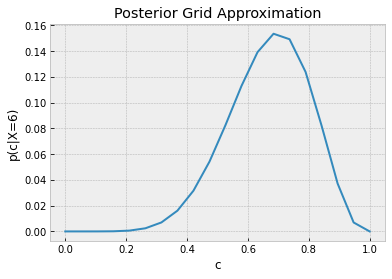

In [127]:
plt.figure()
plt.title("Posterior Grid Approximation")
plt.xlabel("c")
plt.ylabel("p(c|X=6)")
plt.plot(prior, posterior)